# Mean Variance Optimization

- Import data and annualize the mea of monthly returns as well as the volatility of monthly returns with a scaling of $\sqrt(12)$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib as mpl
import seaborn as sns
import scipy as scs
import math


In [2]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
file_path = 'C:/Users/dcste/OneDrive/Portfolio_Theory/Homework_Jupyter/portfolio_theory/multi_asset_etf_data.xlsx'
description = pd.read_excel(file_path,sheet_name = "descriptions")
description

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,101107853,358229114880,The Trust seeks to achieve its investment obje...
1,EFA,iShares MSCI EAFE ETF,ETF,USD,33352872,43798241280,The fund generally will invest at least 80% of...
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,47539498,25870192640,The fund generally will invest at least 80% of...
3,PSP,Invesco Global Listed Private E,ETF,USD,120371,171932880,The fund generally will invest at least 90% of...
4,QAI,IQ Hedge MultiIQ Hedge Multi-St,ETF,USD,138713,707315584,"The fund is a ""fund of funds"" which means it i..."
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,48935762,12276870144,The underlying index is a rules-based index co...
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,2314311,3708376064,The fund pursues its investment objective by i...
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,12097258,4077254400,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7992450,23017226240,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,369873,809217792,"The fund generally invests substantially all, ..."


In [4]:
total_return = pd.read_excel(file_path, sheet_name = "total returns")
total_return = total_return.set_index("Date")
total_return = total_return.drop("SHV", axis = 1)
excess_return = pd.read_excel(file_path, sheet_name = "excess returns")
excess_return = excess_return.set_index("Date")

In [5]:
total_return.columns = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"]


## Question 1

1. Calculate and display the summary statistics of each excess asset's return.
2. Which assets have the best and worst sharpe ratios?

In [6]:
total_return.corr()

,International Treasury ETF,Commodity Index,Emerging,MSCI EAFE,High Yield Index,7-10 Year Treasury Bond,U.S. Real Estate,Private Equity,MultiStrat HedgeFund,SPY,TIPS
International Treasury ETF,1.000000,0.327560,0.603227,0.575751,0.537479,0.351529,0.411551,0.508670,0.641232,0.427215,0.576960
Commodity Index,0.327560,1.000000,0.564615,0.577386,0.450744,-0.405431,0.284214,0.483768,0.530539,0.490920,0.073191
Emerging,0.603227,0.564615,1.000000,0.846499,0.724708,-0.237574,0.598835,0.786492,0.792416,0.734649,0.229728
MSCI EAFE,0.575751,0.577386,0.846499,1.000000,0.762759,-0.264846,0.680872,0.908746,0.837033,0.874024,0.200071
High Yield Index,0.537479,0.450744,0.724708,0.762759,1.000000,-0.088828,0.746952,0.823979,0.760766,0.757582,0.308617
7-10 Year Treasury Bond,0.351529,-0.405431,-0.237574,-0.264846,-0.088828,1.000000,-0.018565,-0.245902,-0.039956,-0.269163,0.680320
U.S. Real Estate,0.411551,0.284214,0.598835,0.680872,0.746952,-0.018565,1.000000,0.745726,0.623356,0.740340,0.328398
Private Equity,0.508670,0.483768,0.786492,0.908746,0.823979,-0.245902,0.745726,1.000000,0.824637,0.903421,0.228678
MultiStrat HedgeFund,0.641232,0.530539,0.792416,0.837033,0.760766,-0.039956,0.623356,0.824637,1.000000,0.832226,0.402777
SPY,0.427215,0.490920,0.734649,0.874024,0.757582,-0.269163,0.740340,0.903421,0.832226,1.000000,0.203344


In [7]:
excess_return.columns = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"]
summary_excess = pd.DataFrame((excess_return.mean()*12), columns = ["Excess Annual Return"])
summary_excess["Volatility"] = excess_return.std()*np.sqrt(12)
summary_excess["Sharpe Ratio"] = summary_excess["Excess Annual Return"]/summary_excess["Volatility"]
summary_excess.sort_values(by = "Sharpe Ratio", ascending = False)

,Excess Annual Return,Volatility,Sharpe Ratio
SPY,0.145643,0.145260,1.002640
U.S. Real Estate,0.145477,0.184744,0.787452
High Yield Index,0.066938,0.089701,0.746233
TIPS,0.030317,0.047681,0.635828
Private Equity,0.128622,0.221773,0.579971
MSCI EAFE,0.076474,0.162298,0.471197
MultiStrat HedgeFund,0.018212,0.049174,0.370346
7-10 Year Treasury Bond,0.021182,0.059387,0.356685
Emerging,0.067971,0.192071,0.353884
Commodity Index,0.034196,0.180663,0.189279


In [8]:
# Scaling excess monthly return to yearly return
# This is if the risk free rate is equal to 0
annualized_mean = pd.DataFrame((total_return.mean()*12), columns = ["Annual Return"])
annualized_mean["Volatility"] = total_return.std()*np.sqrt(12)
annualized_mean["Sharpe Ratio"] = annualized_mean["Annual Return"]/annualized_mean["Volatility"]
annualized_mean.sort_values(by = "Sharpe Ratio",ascending = False)

,Annual Return,Volatility,Sharpe Ratio
SPY,0.150293,0.144811,1.037857
U.S. Real Estate,0.150128,0.184407,0.814113
High Yield Index,0.071588,0.089403,0.800730
TIPS,0.034967,0.047833,0.731032
Private Equity,0.133272,0.221299,0.602227
MSCI EAFE,0.081124,0.161885,0.501125
MultiStrat HedgeFund,0.022862,0.048879,0.467723
7-10 Year Treasury Bond,0.025833,0.060077,0.429996
Emerging,0.072621,0.191787,0.378655
Commodity Index,0.038846,0.180186,0.215590


The best Sharpe Ratio is SPY with a value of 1.0026. The worst sharpe ratio is the International Treasury ETF.

## Question 2
a. Calculate the correlation matrix of the returns. Which pair has the highest and lowest correlation?

b. How well have TIPs done in the sample? Hve they outperformed domestic or foreign bonds?

c. Based on the data, do TIPs seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

<AxesSubplot:>

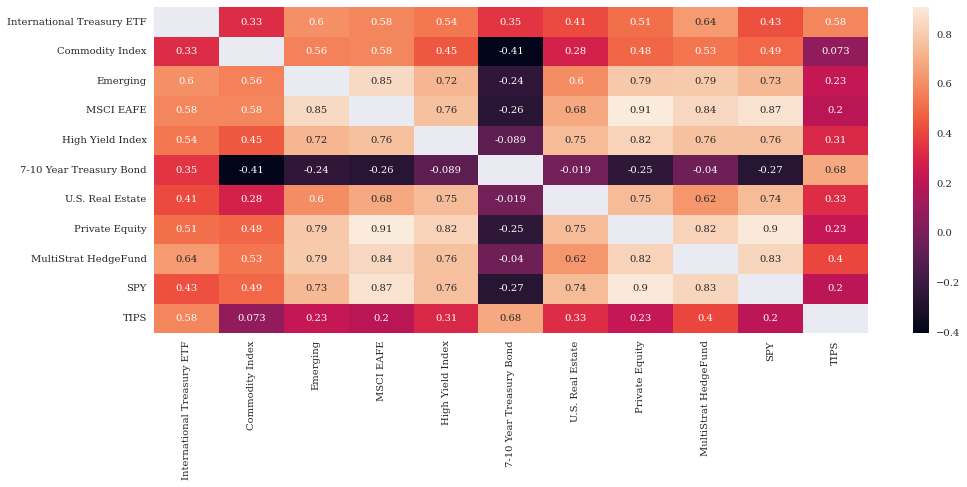

In [9]:
corr_mat = total_return.corr()
plt.figure(figsize = (16,6))
corr_mat[corr_mat == 1] = None
sns.heatmap(corr_mat,annot = True)



In [10]:
corr_rank = pd.DataFrame(corr_mat.unstack().sort_values().dropna(), columns = ["Correlation"])
corr_rank

Correlation
7-10 Year Treasury Bond Commodity Index            -0.405431
Commodity Index         7-10 Year Treasury Bond    -0.405431
SPY                     7-10 Year Treasury Bond    -0.269163
7-10 Year Treasury Bond SPY                        -0.269163
MSCI EAFE               7-10 Year Treasury Bond    -0.264846
...                                                      ...
                        SPY                         0.874024
Private Equity          SPY                         0.903421
SPY                     Private Equity              0.903421
Private Equity          MSCI EAFE                   0.908746
MSCI EAFE               Private Equity              0.908746

[110 rows x 1 columns]

1. As you can see the pair that has the higest correlation is MSCI EAFE and Private Equity being $0.90987$. The pair that has the smallest correlation is the 7-10 Year Treasury Bond and Commodity Index with a correlation of $-.405431$. 

<AxesSubplot:title={'center':'Value of $1 Invested'}, xlabel='Date'>

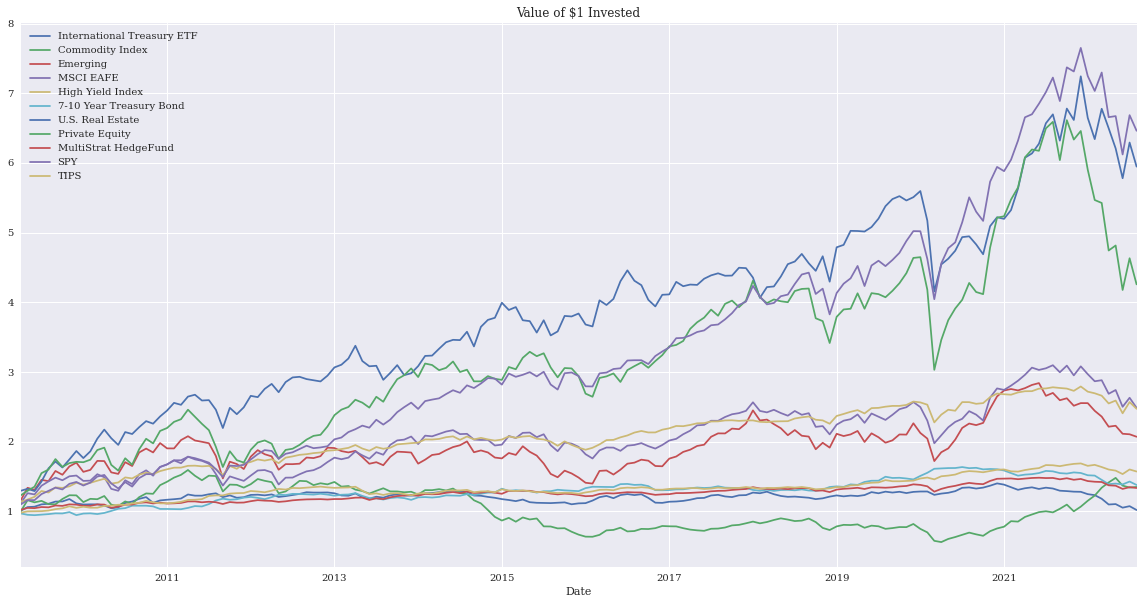

In [11]:

cum_returns = (total_return + 1).cumprod()
cum_returns.plot(figsize = (20,10), title = "Value of $1 Invested")

In [12]:
cum_returns[["International Treasury ETF","7-10 Year Treasury Bond","TIPS", "High Yield Index"]].tail(3)

,International Treasury ETF,7-10 Year Treasury Bond,TIPS,High Yield Index
Date,,,,
2022-06-30,1.054727,1.388467,1.536603,2.408520
2022-07-31,1.076289,1.429586,1.602828,2.569864
2022-08-31,1.021213,1.380211,1.573448,2.472660


In [13]:
annualized_mean.loc[["International Treasury ETF", "7-10 Year Treasury Bond","TIPS", "High Yield Index"]].sort_values(by = "Sharpe Ratio")

,Annual Return,Volatility,Sharpe Ratio
International Treasury ETF,0.004653,0.078535,0.059248
7-10 Year Treasury Bond,0.025833,0.060077,0.429996
TIPS,0.034967,0.047833,0.731032
High Yield Index,0.071588,0.089403,0.800730



1. All in all *Treasury Inflation-Protected Securities* do not perform exceedingly well between 2010-2022, with an average annual return of around $3%$. Compared to the International Treasury ETF and the 7-10 Year Domestic Treasury performance, TIPS do outperform in all measures - cumulative returns, annualized returns, and have a higher sharpe ratio.

2. Based on the data, **TIPS** definitely expand the investment opportunity offering any portfolio a better risk-return profile. The reason why TIPS expand the investment opportunity set because traditional fixed income assets respond to unanticipated inflation with a declining price (because the **ytm increases**). In contrast, inflation indexed bonds respond to unancipated inflation with an increasing price since the principal is increases in proportion to inflation. When two assets respond in an opposite fashion to an important variable , it is important to categorize them in separate asset classes. 


- Yes, *Harvard* should consider **Treasury Inflation-Protected Securities as a separate asset class.**


## Question 3
1. Compute and display the weights of the tangency portfolios: $w^t$
2. Compute the mean, volatility, and sharpe ratio for the tangency portfolio corresponding to $w^t$.

In [101]:
def compute_tangency(df_tilde, diagonalize_Sigma=False):

    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.
    omega_tangency = pd.Series(weights, index=mu_tilde.index)
    
    return omega_tangency, mu_tilde, Sigma_adj


The weights above reflect the weights of the portfolio tangent to mean-volatitility frontier.

In [108]:
def portfolio_stats(df_tilde, omega, annualize_fac):
    # Mean
    mean = df_tilde.mean() @ omega * annualize_fac

    # Volatility
    vol = (df_tilde @ omega).std() * np.sqrt(12)


    # Sharpe ratio
    sharpe_ratio = mean / vol

    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
                              index = ['Mean', 'Volatility', 'Sharpe'], 
                              columns = ['Portfolio Stats']), 4)

portfolio_stats(total_return,omega_tangency, 12)

,Portfolio Stats
Mean,0.3428
Volatility,0.1759
Sharpe,1.9493


The stats above reflect the mean, variance, and sharpe ratio of portfolio $w^t$ that is tangent to the mean-volatiltiy frontier. 

## Question 4 - The Allocation
Here I will calculate the optimized portfolio allocation with a target return of 1.5%.

In [103]:
def target_mv_portfolio(df_tilde, target_return=0.01, diagonalize_Sigma=False):

    omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde, diagonalize_Sigma=diagonalize_Sigma)

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    Sigma_inv = np.linalg.inv(Sigma_adj)

    N = Sigma_adj.shape[0]

    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu_tilde)/(mu_tilde @ Sigma_inv @ mu_tilde)) * target_return

    omega_star = delta_tilde * omega_tangency

    return omega_star, mu_tilde, Sigma_adj

In [104]:
optimized_portfolio = target_mv_portfolio(total_return, target_return = 0.015)
pd.DataFrame(optimized_portfolio[0], columns = ["Allocation"])

,Allocation
International Treasury ETF,-0.701036
Commodity Index,0.125567
Emerging,0.178406
MSCI EAFE,-0.061467
High Yield Index,0.562065
7-10 Year Treasury Bond,1.290558
U.S. Real Estate,-0.161603
Private Equity,-0.269394
MultiStrat HedgeFund,-2.076706
SPY,1.276209


The weights above relfect the optimized asset allocation of the mean-variance portfolu with a targeted expected return of 1.5%

In [19]:
portfolio_stats(total_return, optimized_portfolio, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.0934
Sharpe,1.9271


The stats above refelect the mean, standard deviation, and sharpe ratio of the allocation weights $w^p$.

Discuss the allocation:

- The assets in which you are most long in are SPY and High Yield Bond Index. Some of the allocations are greater $|1|$, which is unrealistic since this would involve investing with a high degree of levarage. 
- The positions in which you are most short are BWX (SPDR Bloomberg International Treasury), Private Equity, and MultiQ Hedge Multi-Strategy Index. This involves taking **negative positions** by borrowing shares from prime broker an then immediately *selling* the asses with the intention of buying them back at a later date to profit from price declines. 

Does the $w^p$ allocation align with the assets that have the strongest Sharpe Ratios?

**Answer:** No, I the $w^p$ portfolio allocations do align with the sharpe ratios. As you can see below, we there is a positive correlation between sharpe ratio and asset allocation. Specifically the correlation is 0.42. All this means is that, generally, higher sharpe values tend to have *positive* allocations. SPY has a sharpe ratio of 1.03-so we can expect to see a postive allocation-with our data we have an allocation 1.21. For Multi-Strat Hedge, we have the largest negative allocation of -1.54. Althougth Multi-Strat Hedge doe not have the lowest sharpe, its asset class does not offer great risk-adjusted returns



In [20]:
print(annualized_mean)
print()
print(optimized_portfolio)


                            Annual Return  Volatility  Sharpe Ratio
International Treasury ETF       0.004653    0.078535      0.059248
Commodity Index                  0.038846    0.180186      0.215590
Emerging                         0.072621    0.191787      0.378655
MSCI EAFE                        0.081124    0.161885      0.501125
High Yield Index                 0.071588    0.089403      0.800730
7-10 Year Treasury Bond          0.025833    0.060077      0.429996
U.S. Real Estate                 0.150128    0.184407      0.814113
Private Equity                   0.133272    0.221299      0.602227
MultiStrat HedgeFund             0.022862    0.048879      0.467723
SPY                              0.150293    0.144811      1.037857
TIPS                             0.034967    0.047833      0.731032

International Treasury ETF   -0.743896
Commodity Index               0.125074
Emerging                      0.140120
MSCI EAFE                    -0.043110
High Yield Index           

In [21]:
np.corrcoef(annualized_mean["Sharpe Ratio"], optimized_portfolio)

array([[1.        , 0.44202232],
       [0.44202232, 1.        ]])

## Simple Portfolios

- A) Calculate the performance of an equally-weighted portfolio over the sample. Rescale the entire weighting vector to have a $u^p = 0.015$. Report its mean, volatility, and Sharpe ratio. 

In [22]:

equal_weights = np.repeat(1/11,11)
portfolio_stats(total_return,equal_weights,12)


,Portfolio Stats
Mean,0.0715
Volatility,0.0999
Sharpe,0.7152


In [23]:
target_return = 0.015
equal_weight_scaled = equal_weights *(target_return/(total_return.mean() @ equal_weights))
portfolio_stats(total_return,equal_weight_scaled,12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2517
Sharpe,0.7152


Calculating the performance of the risk parity portfolio with weights

- $w^i = \frac{1}{\sigma_i}$

In [24]:
w = 1/(total_return.std())
target_mean = 0.015
factor = 1/((w @ total_return.mean())/target_mean)
w = factor *w
pd.DataFrame(w, columns = ["Weights"])

,Weights
International Treasury ETF,0.379571
Commodity Index,0.165439
Emerging,0.155431
MSCI EAFE,0.184142
High Yield Index,0.333430
7-10 Year Treasury Bond,0.496193
U.S. Real Estate,0.161652
Private Equity,0.134704
MultiStrat HedgeFund,0.609866
SPY,0.205852


In [25]:
portfolio_stats(total_return,w,12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2356
Sharpe,0.7640


- How does this compare tothe MV portfolio from problem 2.4?

**Answer:**

- The *risk parity portfolio* is a lot more **inefficient** than the mean-variance portfolio calculated in 2.4. We see that both porfolios have the same expected return of 18%, however, the Mean-Variance porfolio lies on the efficient frontier, whereas the risk parity porfolio lies inside the efficient frontier. 
- In fact the sharpe ratio for the MV portfolio is 2.522 times greater than the risk parity porfolio. 


- It would be unwise to allocate according to the risk parity porfolio weights. 

## Question 6 (TIPS Affect on Sharpe Ratio)

- Assess the performance of the MV Portfolio if we drop TIPS from the investment set relative to the original MV porfolio statistics.

In [26]:
total_return_2 = total_return.drop(columns=["TIPS"])



In [27]:
tangency_weight_no_tip = compute_tangency(total_return_2)
tangency_weight_no_tip

(International Treasury ETF   -1.425461
 Commodity Index               0.310110
 Emerging                      0.392642
 MSCI EAFE                    -0.188777
 High Yield Index              1.141159
 7-10 Year Treasury Bond       3.154791
 U.S. Real Estate             -0.315906
 Private Equity               -0.524867
 MultiStrat HedgeFund         -4.217960
 SPY                           2.674270
 dtype: float64,
 International Treasury ETF    0.000388
 Commodity Index               0.003237
 Emerging                      0.006052
 MSCI EAFE                     0.006760
 High Yield Index              0.005966
 7-10 Year Treasury Bond       0.002153
 U.S. Real Estate              0.012511
 Private Equity                0.011106
 MultiStrat HedgeFund          0.001905
 SPY                           0.012524
 dtype: float64,
                             International Treasury ETF  Commodity Index  \
 International Treasury ETF                    0.000514         0.000386   
 Commodity Ind

In [28]:
optimized_no_tip = target_mv_portfolio(total_return_2, tangency_weight_no_tip[0],0.015)
pd.DataFrame(optimized_no_tip, columns = ["Allocation"])

,Allocation
International Treasury ETF,-0.739181
Commodity Index,0.155252
Emerging,0.151514
MSCI EAFE,-0.077601
High Yield Index,0.602196
7-10 Year Treasury Bond,1.597092
U.S. Real Estate,-0.153831
Private Equity,-0.303840
MultiStrat HedgeFund,-1.465329
SPY,1.233728


In [29]:
print(portfolio_stats(total_return_2,optimized_no_tip,12))
print()
print(portfolio_stats(total_return,optimized_portfolio,12))


            Portfolio Stats
Mean                 0.1800
Volatility           0.0941
Sharpe               1.9131

            Portfolio Stats
Mean                 0.1800
Volatility           0.0934
Sharpe               1.9271


- As you can see there is a very slight increase in volatility and a slight decline in the sharpe ratio when you remove *TIPS* from the portfolio suggesting including *Treasury-Inflation Protected Securities* offers better risk-adjusted returns. 


## Out of Sample Performance

- Using only data through the end of 2021, compute $w^p$ with a $\mu^p = 0.15$, allocating to all 11 assets. 

- Using the weights $w^p$, calculate the portfolio's sharpe ratio within that sample through the end of 2021. 

- Again using those weights, calculate the portfolio's Sharpe ratio based ont he performance in 2022

In [30]:
train_data = total_return[:'2021-12-31']
test_data = total_return['2022-01-31':]
train_tangency = compute_tangency(train_data)
train_tangency_p = train_tangency[0]
target_train_p = target_mv_portfolio(train_data, train_tangency_p,0.015)
pd.DataFrame(target_train_p, columns = ["Weights through end of 2021"])

,Weights through end of 2021
International Treasury ETF,-0.260550
Commodity Index,-0.013134
Emerging,0.003842
MSCI EAFE,-0.058326
High Yield Index,0.665042
7-10 Year Treasury Bond,1.186294
U.S. Real Estate,-0.257773
Private Equity,-0.087996
MultiStrat HedgeFund,-1.587112
SPY,1.109137


In [31]:
portfolio_stats(train_data,target_train_p,12)

,Portfolio Stats
Mean,0.180
Volatility,0.078
Sharpe,2.308


The weights above are the tangency weights for the portfolio $w^p$ throught the end of 2021. Additionally, you can see the resulting portfolio statistics across these asset classes. The Sharpe ratio is significantly higher, but that would make sense given bullish market through the end of 2021.

In [110]:
portfolio_stats(test_data, target_train_p, 12)

,Portfolio Stats
Mean,-0.1707
Volatility,0.2299
Sharpe,-0.7423


This portfolio is significantly different, but we would these statitics given how the market has behaved with increased selling pressures across all financial markets and fear arising from impending recession.

In [33]:
excess_min = compute_tangency(excess_return)
excess_optimal = target_mv_portfolio(excess_return, excess_min[0], 0.02)

In [34]:
print(excess_optimal)
print()
print(portfolio_stats(excess_return,excess_optimal, 12))
print()
print(portfolio_stats(total_return, optimized_portfolio, 12))
print()


International Treasury ETF   -0.972772
Commodity Index               0.169652
Emerging                      0.221652
MSCI EAFE                    -0.073650
High Yield Index              0.791712
7-10 Year Treasury Bond       1.777450
U.S. Real Estate             -0.222001
Private Equity               -0.396242
MultiStrat HedgeFund         -2.513453
SPY                           1.698873
TIPS                          0.518779
dtype: float64

            Portfolio Stats
Mean                 0.2400
Volatility           0.1258
Sharpe               1.9077

            Portfolio Stats
Mean                 0.1800
Volatility           0.0934
Sharpe               1.9271



## Excess Returns 

1. Re-do the analysis for **excess** returns. 
   1. Subtract *SHV* from each total return in order to form **excess** returns, $\tilde{r}$.
   2. Use the section of the notes "Excess Returns." Particularly the solutions in slide 50.


In [68]:
def tangency_portfolio_rfr(df,cov_diagnolized = False):
    excess_r = df.copy()
    return_excess = excess_r.mean()
    sigma_rfr = df.cov()
    sigma_inv = np.linalg.inv(sigma_rfr)
    n = sigma_rfr.shape[0]
    num = sigma_inv @ return_excess
    den = np.ones(n).T @ sigma_inv @ return_excess
    w_t = pd.Series(num/den, df.columns)
    return w_t
def mv_portfolio_rfr(df, tangency_weights, target_return = 0.01):
    excess_returns = df.copy()
    asset_cov = df.cov()
    asset_return = excess_returns.mean()
    sigma_inv = np.linalg.inv(asset_cov)
    n = sigma_inv.shape[0]
    delta_denom = asset_return.T @ sigma_inv @ asset_return
    delta_num = np.ones(n).T @ sigma_inv @ asset_return
    delta = (delta_num/delta_denom)*target_return
    omega_star = pd.Series(delta * tangency_weights, index = df.columns)
    return (omega_star)

In [69]:
tang_rfr = tangency_portfolio_rfr(excess_return)
tang_rfr

International Treasury ETF   -2.521104
Commodity Index               0.468378
Emerging                      0.744506
MSCI EAFE                    -0.267319
High Yield Index              2.007920
7-10 Year Treasury Bond       4.799263
U.S. Real Estate             -0.600881
Private Equity               -0.912219
MultiStrat HedgeFund         -8.823273
SPY                           4.894721
TIPS                          1.210008
dtype: float64

In [37]:
mv_rfr_portfolio = mv_portfolio_rfr(excess_return, tang_rfr,0.015)
pd.DataFrame([mv_rfr_portfolio,tang_rfr], index = ["MV Weight", "Tangency Weight"])

,International Treasury ETF,Commodity Index,Emerging,MSCI EAFE,High Yield Index,7-10 Year Treasury Bond,U.S. Real Estate,Private Equity,MultiStrat HedgeFund,SPY,TIPS
MV Weight,-0.680999,0.126518,0.201106,-0.072208,0.542378,1.296374,-0.162310,-0.246408,-2.383338,1.322159,0.326847
Tangency Weight,-2.521104,0.468378,0.744506,-0.267319,2.007920,4.799263,-0.600881,-0.912219,-8.823273,4.894721,1.210008


In [38]:
def correlation(df):
    cor_mat = df.corr()
    plt.figure(figsize = (16,6))
    cor_mat[corr_mat == 1] = None
    sns.heatmap(cor_mat,annot = True)
    

In [39]:
def performance_summary(df, annualization = 12):
    performance = pd.DataFrame()
    performance["Annualized Mean"] = df.mean()*annualization
    performance["Annualized Volatility"] = df.std()*np.sqrt(annualization)
    performance["Sharpe Ratio"] = performance["Annualized Mean"]/performance["Annualized Volatility"]
    

    return round(performance,6)

In [40]:
performance_summary(excess_return)

,Annualized Mean,Annualized Volatility,Sharpe Ratio
International Treasury ETF,0.000003,0.078307,0.000034
Commodity Index,0.034196,0.180663,0.189279
Emerging,0.067971,0.192071,0.353884
MSCI EAFE,0.076474,0.162298,0.471197
High Yield Index,0.066938,0.089701,0.746233
7-10 Year Treasury Bond,0.021182,0.059387,0.356685
U.S. Real Estate,0.145477,0.184744,0.787452
Private Equity,0.128622,0.221773,0.579971
MultiStrat HedgeFund,0.018212,0.049174,0.370346
SPY,0.145643,0.145260,1.002640


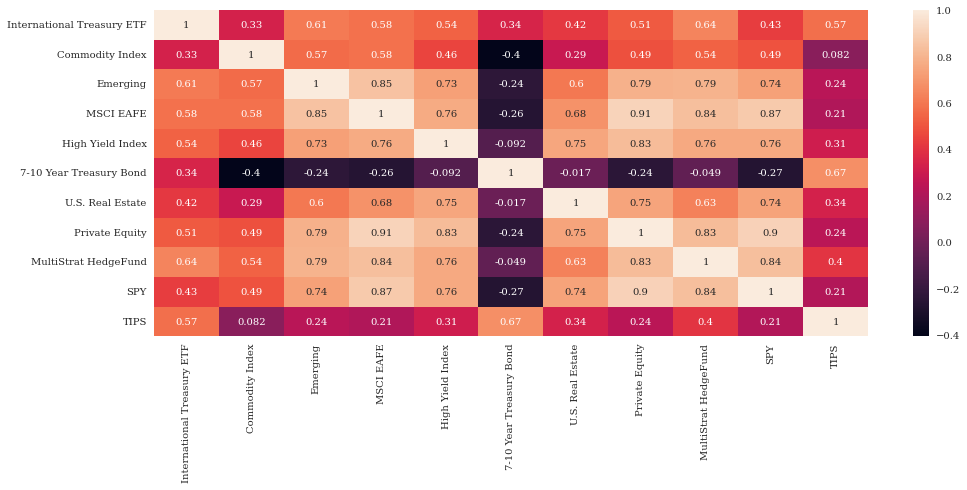

In [41]:
correlation(excess_return)

In [42]:
# Compute Peformance Statistics of the RFR Portfolios
tang_stats = portfolio_stats(excess_return,tang_rfr,12)
mvrfr_stats = portfolio_stats(excess_return, mv_rfr_portfolio,12)
pd.concat([tang_stats,mvrfr_stats], axis = 1)

,Portfolio Stats,Portfolio Stats
Mean,0.6664,0.1800
Volatility,0.3454,0.0933
Sharpe,1.9291,1.9291


## Long-Short Positions

- Consider only allocations between Domestic Bonds and Inflatin Protected Bonds. Drop all other return columns and recompute the mean-variance portfolio

In [43]:
mutual_fund = excess_return[["7-10 Year Treasury Bond", "TIPS"]]
mutual_fund_tan = tangency_portfolio_rfr(mutual_fund)
mv_mutual_fund = mv_portfolio_rfr(mutual_fund,mutual_fund_tan,.0135)
mv_mutual_fund.to_frame("Weights")

,Weights
7-10 Year Treasury Bond,-0.861631
TIPS,5.945552


What is causing the extreme long and short positions?

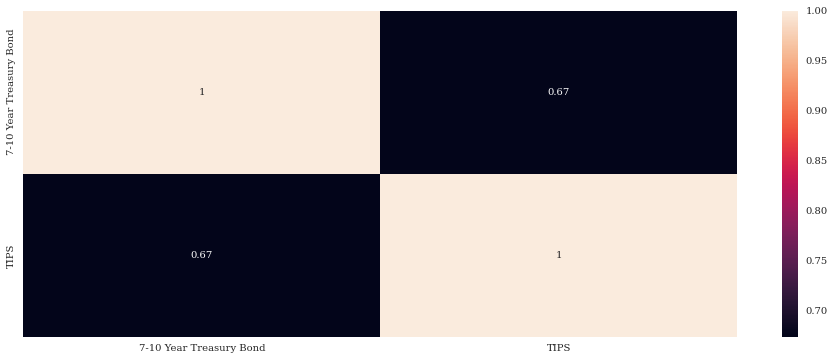

In [44]:
correlation(mutual_fund)

In [45]:
performance_summary(mutual_fund)

,Annualized Mean,Annualized Volatility,Sharpe Ratio
7-10 Year Treasury Bond,0.021182,0.059387,0.356685
TIPS,0.030317,0.047681,0.635828


- They are highly correlated, **TIPs** outperform Bonds on a risk-adjusted basis and with a higher mean return.

**Make an adustment to $\tilde{u}^{TIP} = -.0015$**
- Recompute the mean-variancce optimization $w^{p}$

In [47]:
performance_fi = performance_summary(mutual_fund)
performance_fi.loc["TIPS",["Annualized Mean"]] = performance_fi.loc["TIPS",["Annualized Mean"]] + (-.0015*12)
performance_fi

,Annualized Mean,Annualized Volatility,Sharpe Ratio
7-10 Year Treasury Bond,0.021182,0.059387,0.356685
TIPS,0.012317,0.047681,0.635828


# Practice Questions From 2021 Exam

- Use the proshares data from 2021 and use the 3M TB as the *risk free rate* to subtract from the columns of the of the merril factors tab.

- Compute the tangency portfolio

In [56]:
file_path_2021 = "C:/Users/dcste/OneDrive/Portfolio_Theory/Homework_Jupyter/portfolio_theory/proshares_analysis_data_2021 (1).xlsx"
factors_2021 = pd.read_excel(file_path_2021, sheet_name= 'merrill_factors').set_index("date")
factors_2021.head()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
2011-09-30,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
2011-10-31,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
2011-11-30,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
2011-12-31,0.010440,0.000009,-0.043017,-0.022139,0.075581,0.005114


In [57]:
factors_2021 = factors_2021.subtract(factors_2021["USGG3M Index"], axis = 0).drop(columns = ["USGG3M Index"])
factors_2021.head()

,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,
2011-08-31,-0.054984,-0.092558,-0.087557,-0.005898,-0.088922
2011-09-30,-0.069466,-0.179081,-0.108100,0.142163,-0.111557
2011-10-31,0.109160,0.162999,0.096287,-0.069489,0.151024
2011-11-30,-0.004064,-0.019723,-0.021764,0.054627,-0.003783
2011-12-31,0.010431,-0.043025,-0.022147,0.075573,0.005105


In [106]:
tangency_2021 = compute_tangency(factors_2021)
tangency_2021[0].to_frame("Tangency Weight")


,Tangency Weight
SPY US Equity,2.173616
EEM US Equity,-0.152124
EFA US Equity,-0.754759
EUO US Equity,0.181807
IWM US Equity,-0.448540


- What are the optimal weights with a targeted expected return of 2%?

In [105]:
optimal_2021 = target_mv_portfolio(factors_2021,.02)
optimal_2021[0].to_frame("Optimal Weights")

,Optimal Weights
SPY US Equity,2.516093
EEM US Equity,-0.176092
EFA US Equity,-0.873680
EUO US Equity,0.210452
IWM US Equity,-0.519212


Report the mean, vol, and sharpe of the portfolio

In [109]:
portfolio_stats(factors_2021,optimal_2021[0],12)

,Portfolio Stats
Mean,0.2400
Volatility,0.1586
Sharpe,1.5136


What is the optimal hedge ratio over the full sample of data. For every dollar invested in EEM, what would you invest in SPY?

In [115]:
x = factors_2021["SPY US Equity"]
y = factors_2021["EEM US Equity"]
hedge_reg = sm.OLS(y,x).fit()
hedge_reg.summary()
hedge_reg.params.to_frame("Hedge")

,Hedge
SPY US Equity,0.92566


What is the mean,vol, and sharpe of this hedge position?

In [128]:
hedge_pos = (factors_2021["EEM US Equity"]-(hedge_reg.params[0]*factors_2021["SPY US Equity"])).to_frame("Hedge Position")
performance_summary(hedge_pos,12)

,Annualized Mean,Annualized Volatility,Sharpe Ratio
Hedge Position,-0.093509,0.12581,-0.743255


In [129]:
performance_summary(factors_2021,12)

,Annualized Mean,Annualized Volatility,Sharpe Ratio
SPY US Equity,0.141837,0.135519,1.046627
EEM US Equity,0.037784,0.183378,0.206046
EFA US Equity,0.061864,0.147165,0.420370
EUO US Equity,0.044049,0.156321,0.281785
IWM US Equity,0.126044,0.187799,0.671166


Does the hedged position have the same mean as EEM? Why or why not?

No the mean of EEM is 3.7% whereas the hedge position is about -9%.
This is because we subtracted the hedge position of SPY from EEM.

SPY and EFA are highly correlated. How confident are we that SPY will outperfrom EFA over the next 10 years?